In [1]:
import axon

In [2]:
import numpy as np

In [3]:
data = np.random.rand(1000000, 6)
l, r = np.hsplit(data, 2)
labels = np.cross(l, r, axis = 1)

In [4]:
data[:5]

array([[0.45782773, 0.96991981, 0.53618977, 0.81644333, 0.82740829,
        0.80853865],
       [0.26099236, 0.41559656, 0.58522487, 0.53220492, 0.1959814 ,
        0.53437089],
       [0.49061934, 0.2128554 , 0.92399737, 0.61142109, 0.45120405,
        0.94727262],
       [0.8320903 , 0.87265564, 0.98548774, 0.69136099, 0.79241044,
        0.52965637],
       [0.53922969, 0.27267134, 0.9354514 , 0.65147039, 0.00575603,
        0.03070156]])

In [5]:
labels[:5]

array([[ 0.3405698 ,  0.06759714, -0.41307409],
       [ 0.10738952,  0.17199284, -0.17003289],
       [-0.21527927,  0.10020121,  0.09122515],
       [-0.31870315,  0.24060584,  0.05603698],
       [ 0.00298695,  0.59286369, -0.17453348]])

In [6]:
crossnn = axon.Network([6, 12, 12, 6, 3], [axon.activation.LeakyRelu, axon.activation.LeakyRelu, axon.activation.LeakyRelu, axon.activation.Identity], axon.loss.MSE)

In [7]:
losses = crossnn.train(data, labels, axon.Optimizer.SGD_WM, 0.03)

In [8]:
import matplotlib.pyplot as plt

In [9]:
labels[-1]

array([-0.87736069,  0.86846259,  0.09010157])

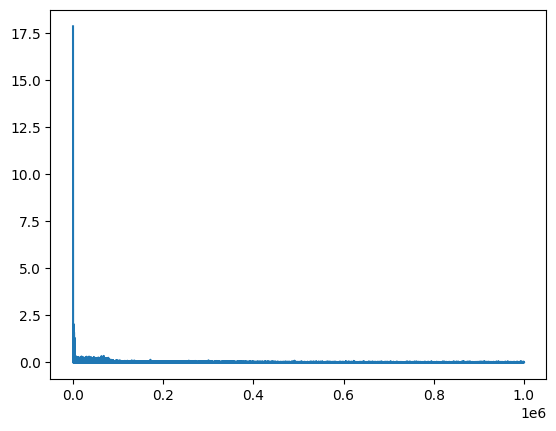

In [10]:
plt.plot(losses)
plt.show()

In [25]:
test_data = np.random.rand(30, 6)
test_l, test_r = np.hsplit(data, 2)
test_labels = np.cross(test_l, test_r, axis = 1)

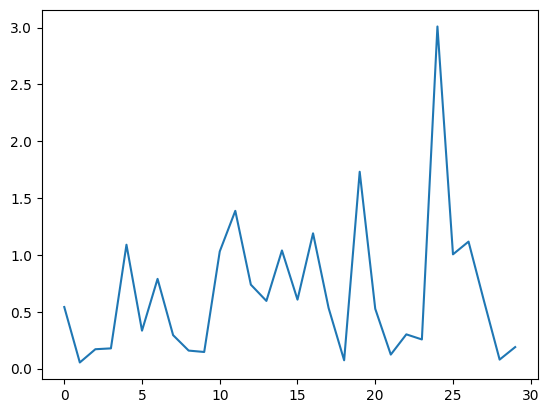

In [26]:
performance = crossnn.test(test_data, test_labels)
plt.plot(performance)
plt.show()

In [30]:
vecs = np.random.rand(1, 6)
lvec, rvec = np.hsplit(vecs, 2)

In [31]:
np.cross(lvec, rvec)

array([[-0.49896056, -0.1226633 ,  0.48800301]])

In [32]:
crossnn.predict(vecs)

array([[[-0.51991779],
        [-0.08303518],
        [ 0.52005525]]])

In [16]:
crossnn.write_to('cross_product_model')

In [17]:
nakednn = axon.Network.read('cross_product_model')

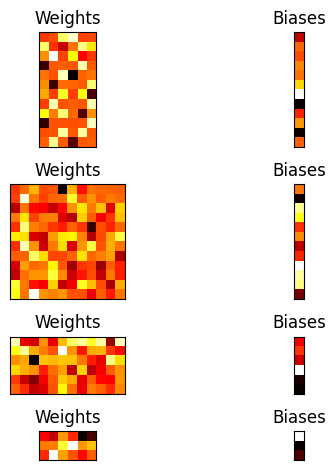

In [18]:
nakednn.visualize()

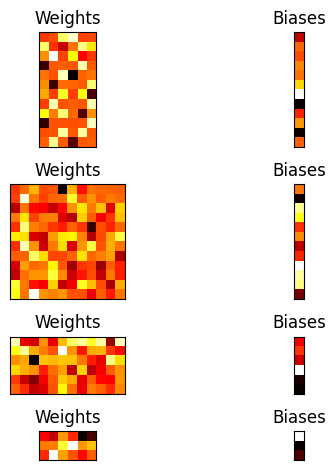

In [19]:
crossnn.visualize()

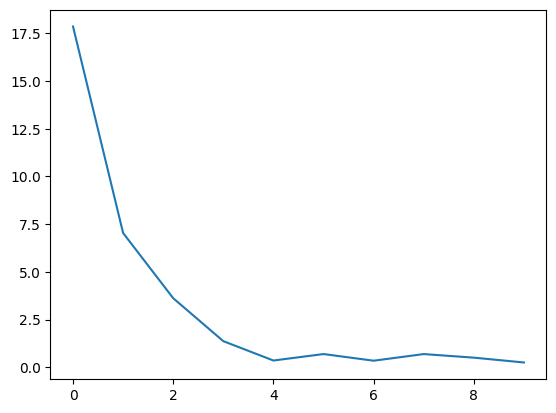

In [20]:
plt.plot(losses[:10])
plt.show()

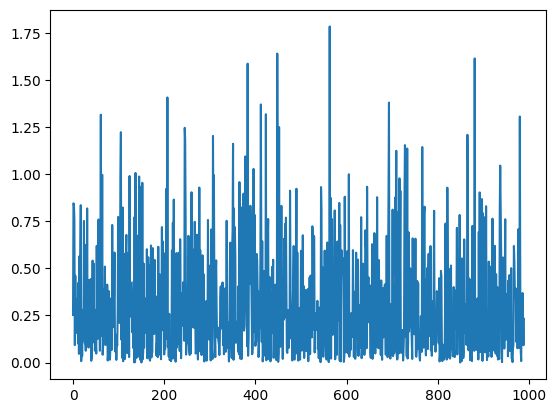

In [21]:
plt.plot(losses[10:1000])
plt.show()

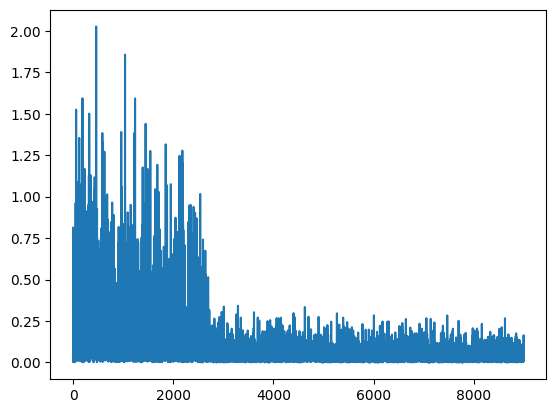

In [22]:
plt.plot(losses[1000:10000])
plt.show()